In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Loading the datasets

orders = pd.read_csv(r"C:\Users\GLXTCH\Documents\orders.csv")
order_details = pd.read_csv(r"C:\Users\GLXTCH\Documents\order_details.csv")
pizza = pd.read_csv(r"C:\Users\GLXTCH\Documents\pizzas.csv")
pizza_types = pd.read_csv(r"C:\Users\GLXTCH\Documents\pizza_types.csv")

In [8]:
# MERGE DATASETS INTO ONE DATAFRAME

df = order_details.merge(orders, on="order_id")
df = df.merge(pizza, on="pizza_id")
df = df.merge(pizza_types, on="pizza_type_id")
df


,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,179,77,hawaiian_m,1,2015-01-02,12:22:46,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
2,357,146,hawaiian_m,1,2015-01-03,14:22:10,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
3,389,163,hawaiian_m,1,2015-01-03,16:54:54,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
4,568,247,hawaiian_m,1,2015-01-04,20:55:29,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48176,21167,brie_carre_s,1,2015-12-27,17:39:57,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni..."
48616,48244,21198,brie_carre_s,1,2015-12-28,15:39:02,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni..."
48617,48311,21225,brie_carre_s,1,2015-12-29,13:20:17,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni..."
48618,48456,21282,brie_carre_s,1,2015-12-31,12:09:59,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni..."


# Exploratory Data Analysis

## What is the total revenue/sales?

In [9]:
# CREATE REVENUE COLUMN
df["revenue"] = df["quantity"] * df["price"]

In [10]:
# TOTAL REVENUE
total_revenue = df["revenue"].sum()
total_revenue

817860.05

## Find the total quantity sold.

In [12]:
# TOTAL QUANTITY SOLD
total_quantity = df["quantity"].sum()
total_quantity

49574

## Find the total orders.

In [13]:
# TOTAL ORDERS
total_orders = df["order_id"].nunique()
total_orders


21350

## How many pizza types do they sell?

In [14]:
# NUMBER OF PIZZA TYPES
num_pizza_types = df["pizza_type_id"].nunique()
num_pizza_types

32

## Find the average price of the pizzas.

In [15]:
# AVERAGE PRICE
avg_price = df["price"].mean()
avg_price

16.49413204442518

## What are the peak hours of sales?

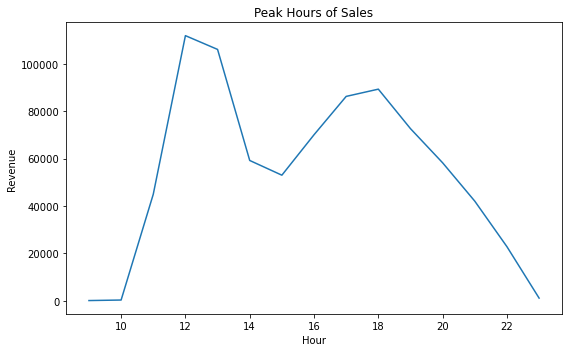

In [24]:
# PEAK HOURS OF SALES
peak_hours = df.groupby("time")["revenue"].sum().reset_index()

plt.figure(figsize=(8,5))
plt.plot(peak_hours["time"], peak_hours["revenue"])
plt.xlabel("Hour")
plt.ylabel("Revenue")
plt.title("Peak Hours of Sales")
plt.tight_layout()
plt.show()


## Find the total sales made on each day of the week. Which day of the week is when sales are made the most?


In [25]:
# SALES BY DAY OF WEEK
df["day_of_week"] = df["date"].dt.day_name()

sales_by_day = df.groupby("day_of_week")["revenue"].sum().reset_index()
sales_by_day.sort_values("revenue", ascending=False)


,day_of_week,revenue
0,Friday,136073.90
4,Thursday,123528.50
2,Saturday,123182.40
6,Wednesday,114408.40
5,Tuesday,114133.80
1,Monday,107329.55
3,Sunday,99203.50


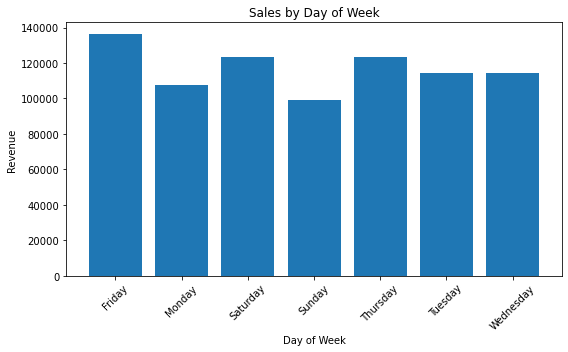

In [26]:
plt.figure(figsize=(8,5))
plt.bar(sales_by_day["day_of_week"], sales_by_day["revenue"])
plt.xticks(rotation=45)
plt.xlabel("Day of Week")
plt.ylabel("Revenue")
plt.title("Sales by Day of Week")
plt.tight_layout()
plt.show()

## Find the top 5 bestselling pizzas.

In [27]:
# TOP 5 BESTSELLING PIZZAS
top5_pizzas = (df.groupby("name")["quantity"].sum().sort_values(ascending=False).head(5))
top5_pizzas

name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64

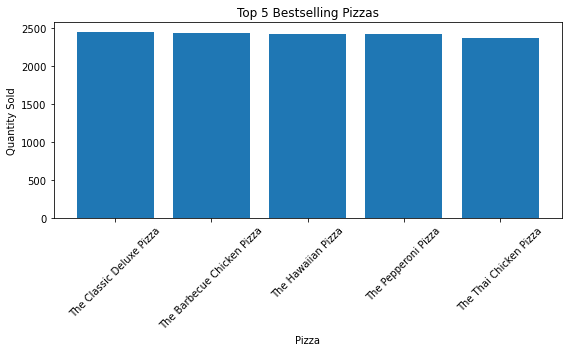

In [30]:
plt.figure(figsize=(8,5))
plt.bar(top5_pizzas.index, top5_pizzas.values)
plt.xticks(rotation=5)
plt.xlabel("Pizza")
plt.ylabel("Quantity Sold")
plt.title("Top 5 Bestselling Pizzas")
plt.tight_layout()
plt.show()

## Find the sales made in each month. Any trend noticeable?


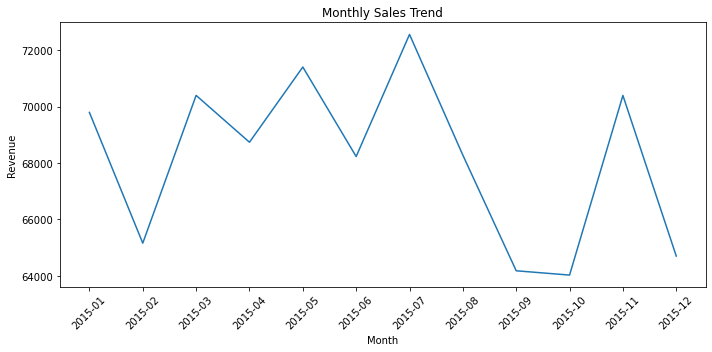

In [31]:
# MONTHLY SALES TREND
df["month"] = df["date"].dt.to_period("M").astype(str)

monthly_sales = df.groupby("month")["revenue"].sum().reset_index()

plt.figure(figsize=(10,5))
plt.plot(monthly_sales["month"], monthly_sales["revenue"])
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Monthly Sales Trend")
plt.tight_layout()
plt.show()

## Are there pizza types that are not doing well on the menu?

In [32]:
# PIZZA TYPES NOT DOING WELL (LOW SALES)
low_sales = (df.groupby("name")["revenue"].sum().sort_values().head(10))
low_sales


name
The Brie Carre Pizza            11588.50
The Green Garden Pizza          13955.75
The Spinach Supreme Pizza       15277.75
The Mediterranean Pizza         15360.50
The Spinach Pesto Pizza         15596.00
The Calabrese Pizza             15934.25
The Italian Vegetables Pizza    16019.25
The Soppressata Pizza           16425.75
The Chicken Pesto Pizza         16701.75
The Chicken Alfredo Pizza       16900.25
Name: revenue, dtype: float64

## More Analysis

In [34]:
# AVERAGE ORDER VALUE
order_value = df.groupby("order_id")["revenue"].sum().mean()
order_value

38.30726229508162

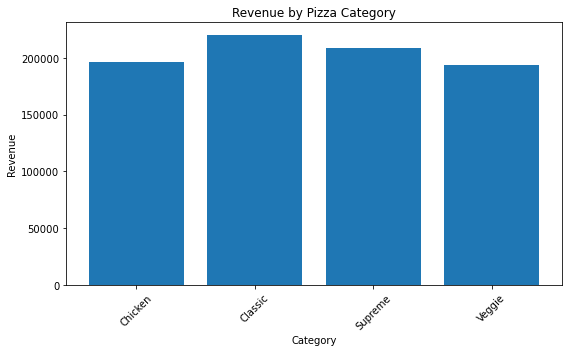

In [35]:
# SALES BY PIZZA CATEGORY
sales_by_category = df.groupby("category")["revenue"].sum().reset_index()

plt.figure(figsize=(8,5))
plt.bar(sales_by_category["category"], sales_by_category["revenue"])
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.title("Revenue by Pizza Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

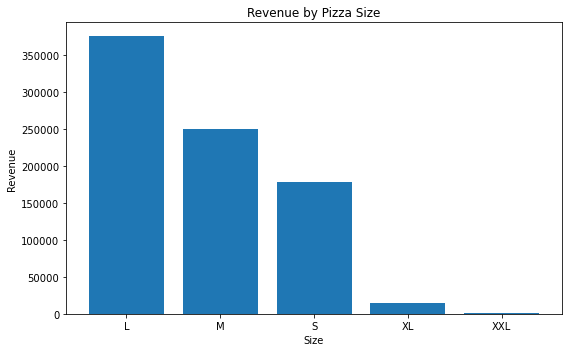

In [36]:
# SALES BY PIZZA SIZE
sales_by_size = df.groupby("size")["revenue"].sum().reset_index()

plt.figure(figsize=(8,5))
plt.bar(sales_by_size["size"], sales_by_size["revenue"])
plt.xlabel("Size")
plt.ylabel("Revenue")
plt.title("Revenue by Pizza Size")
plt.tight_layout()
plt.show()

In [39]:
# TOP 10 PIZZAS BY REVENUE
top10_revenue = (df.groupby("name")["revenue"].sum().sort_values(ascending=False).head(10))
top10_revenue

name
The Thai Chicken Pizza          43434.25
The Barbecue Chicken Pizza      42768.00
The California Chicken Pizza    41409.50
The Classic Deluxe Pizza        38180.50
The Spicy Italian Pizza         34831.25
The Southwest Chicken Pizza     34705.75
The Italian Supreme Pizza       33476.75
The Hawaiian Pizza              32273.25
The Four Cheese Pizza           32265.70
The Sicilian Pizza              30940.50
Name: revenue, dtype: float64

In [42]:
# WORST 10 PIZZAS BY REVENUE
bottom10_revenue = (df.groupby("name")["revenue"].sum().sort_values().head(10))                  
bottom10_revenue

name
The Brie Carre Pizza            11588.50
The Green Garden Pizza          13955.75
The Spinach Supreme Pizza       15277.75
The Mediterranean Pizza         15360.50
The Spinach Pesto Pizza         15596.00
The Calabrese Pizza             15934.25
The Italian Vegetables Pizza    16019.25
The Soppressata Pizza           16425.75
The Chicken Pesto Pizza         16701.75
The Chicken Alfredo Pizza       16900.25
Name: revenue, dtype: float64

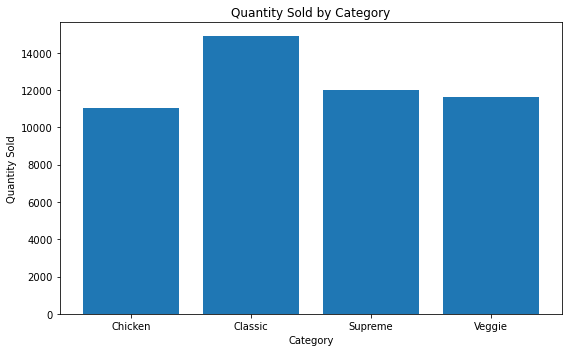

In [43]:
# QUANTITY SOLD BY CATEGORY
qty_by_category = df.groupby("category")["quantity"].sum().reset_index()

plt.figure(figsize=(8,5))
plt.bar(qty_by_category["category"], qty_by_category["quantity"])
plt.xlabel("Category")
plt.ylabel("Quantity Sold")
plt.title("Quantity Sold by Category")
plt.tight_layout()
plt.show()